In [7]:
# open dipole.txt and read the file
f = open("dipole.txt", "r")
# read the file
text = f.read()
# close the file
f.close()
# read the file line by line
lines = text.split("\n")
# read each line
for line in lines:
    # split the line into words
    words = line.split()
    # if the line is not empty
    if len(words) > 0:
        # if the second word has a value greater than 1 then add the line to a list
        if float(words[1]) > 1:
            # add the line into a new file called greater_than_one.txt
            f = open("greater.txt", "a")
            f.write(line + "\n")
            f.close()
        # if the second word has a value less than 1 then add the line to a list
        elif float(words[1]) < 1:
            # add the line into a new file called less_than_one.txt
            f = open("lower.txt", "a")
            f.write(line + "\n")
            f.close()
        else :
            continue
        # if the second word has a value equal to 1 or 0 less than 0  then ignore it



In [8]:
import numpy as np
# solve a cubic equation ax^3 + bx^2 + cx + d = 0 using the method of cubics roots
def find_v(a,b,P,R,T):
    coefficient = np.array([1,-(b+(R*T/P)),(a/P),-a*b/P])
    roots = np.roots(coefficient)
    for i in roots:
        if i.imag == 0:
            return i.real
# open the file real_gas.txt
f = open("real_gas.txt", "r")
# read the file
text = f.read()
# close the file
f.close()
# read the file line by line
lines = text.split("\n")
# read each line
for line in lines:
    # skip the first line
    if line == lines[0]:
        continue
    # split the line into words
    words = line.split()
    # if the line is not empty
    if len(words) > 0:
        # add the first word of the line to a variable called temperature
        temperature = words[0]
        # add the second word of the line to a variable called pressure
        pressure = words[1]
        print(find_v(3.592,4.267*10**-2,float(pressure),0.082,float(temperature)))



0.0470486758782393
0.050569786776365325
0.06543616241201419
0.06475223490877627


0.18146064392463243
0.4944095326598713
0.9021307129816238
1.347073286516485
1.793758227766464
2.2235321735020417
2.6278111389529633
3.003549088963961


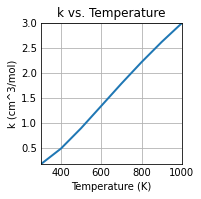

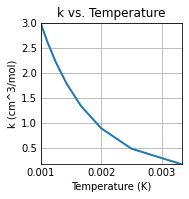

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
# k = A*e**(-Ea/R*T)
def find_k(A, Ea, R, T):
    k = A*math.exp(-Ea/(R*T))
    return k
# find the k value for each of the following value of T
# T = 300, 400, 500, 600, 700, 800, 900, 1000
plt.style.use('_mpl-gallery')

def plot(T, k_list):
    # find min and max of k_list
    min_k = min(k_list)
    max_k = max(k_list)
    # find min and max of T
    min_T = min(T)
    max_T = max(T)
    fig, ax = plt.subplots()
    ax.plot(T, k_list, linewidth=2.0)
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('k (cm^3/mol)')
    ax.set_title('k vs. Temperature')
    ax.set(xlim=(min_T, max_T), ylim=(min_k, max_k))
    ax.grid(True)
    plt.show()

k_list = []
T_list = []
T_inv_list = []

for T in [300, 400, 500, 600, 700, 800, 900, 1000]:
    print(find_k(10, 10000, 8.314, T))
    # add the k value to the list
    k_list.append(find_k(10, 10000, 8.314, T))
    # add the value of k to the list
    T_list.append(T)
    # add the value of 1/T to a list called T_inv_list
    T_inv_list.append(1/T)

plot(T_list, k_list)
plot(T_inv_list, k_list)



    


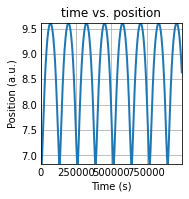

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define some initial parameters
# rate of change of the time step
dt = 50 
# define total time
total_time = 10**6
# set sigma
sigma = 6.69
# set epsilon
epsilon = 8.71*10**-4
# set the initial position of particle
x = 7
# set the initial velocity of particle
v = 0
# calculate the no of steps
steps = int(total_time / dt)
# mass of the particle
mass = 145123
# initialize a list to store the position of particle
position = []
# initialize a list to store the time step
time = []

plt.style.use('_mpl-gallery')

def plot(time, position):
    # find min and max of k_list
    min_y = min(position)
    max_y = max(position)
    # find min and max of T
    min_x = min(time)
    max_x = max(time)
    fig, ax = plt.subplots()
    ax.plot(time, position, linewidth=2.0)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (a.u.)')
    ax.set_title('time vs. position')
    ax.set(xlim=(min_x, max_x), ylim=(min_y, max_y))
    ax.grid(True)
    plt.show()


# Define the function of lpj 
# referenced from https://pythoninchemistry.org/sim_and_scat/molecular_dynamics/intro.html
# referenced from Martínez, L.; Andrade, R.; Birgin, E. G.; Martínez, J. M. J. Comput. Chem. 2009, 30 (13), 2157–2164. 10.1002/jcc.21224.
def lj_force(r, epsilon, sigma):
    # Calculate the force of lj
    return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)

for i in range(0, steps):
    # Calculate the force of lj
    force = lj_force(x, epsilon, sigma)
    # Calculate the acceleration
    acceleration = force / mass
    # Calculate the velocity
    v = v + acceleration * dt
    # Calculate the position
    x = x + v * dt
    # add the position to the list
    position.append(x)
    # add the time step to the list
    time.append(i * dt)

# plot the position of particle vs time
plot(time, position)



In [11]:
# n*lambda = 2*d*sin(theta) d = a/sqrt(h**2+k**2+l**2) take a from user
import math
def main():
    a = float(input("Enter the length of the side of the cube: "))
    # find the value of d from a using the formula d = a/sqrt(h**2+k**2+l**2)
    # as h = 1, k = 1, l = 0 the formula is d = a/sqrt(2)
    d = a/2**0.5
    # find the value of lambda from d using the formula lambda = 2*d*sin(theta) 
    # where n = 1, theta = pi/180*21 as theta = 21 degrees
    lam = 2*d*math.sin(21*math.pi/180)/1
    print("The wavelength is", lam)

if __name__ == "__main__":
    main()

The wavelength is 12.670220364170016
